In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


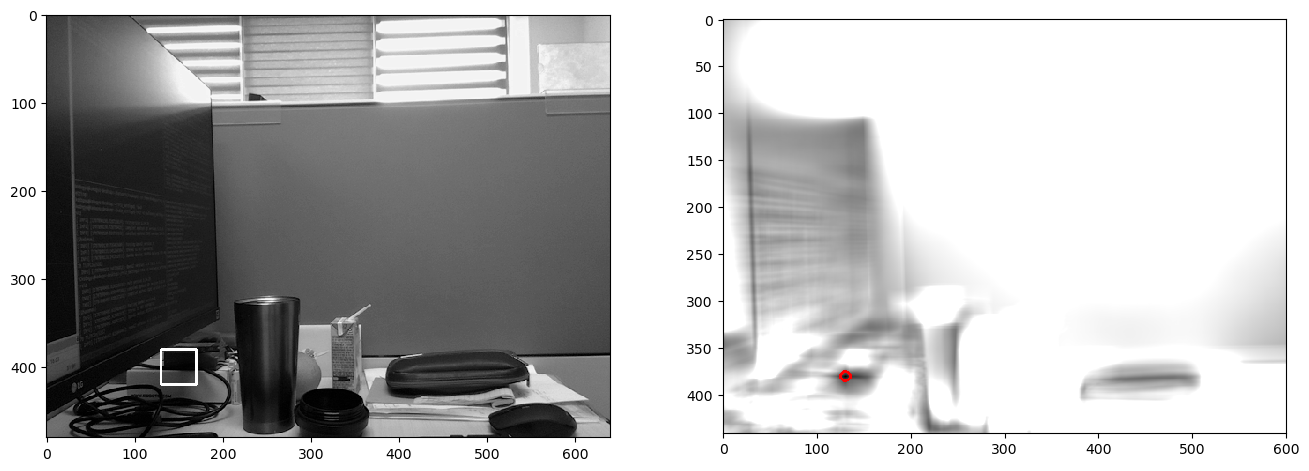

In [4]:
# 입력 이미지와 템플릿 이미지 읽기
input_image = cv2.imread('../ipynb/color_frames/color_image484.png', cv2.IMREAD_GRAYSCALE)
# 480x640
template = input_image[380:420, 130:170]

# 템플릿 매칭 수행
result = cv2.matchTemplate(template, input_image, cv2.TM_SQDIFF_NORMED)
# result = cv2.matchTemplate(input_image, template, cv2.TM_SQDIFF_NORMED)

# 매칭 결과에서 최대값 위치 찾기
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

# 최대값 위치가 템플릿과 일치하는 부분 표시
template_width, template_height = template.shape[::-1]
top_left = min_loc
bottom_right = (top_left[0] + template_width, top_left[1] + template_height)
cv2.rectangle(input_image, top_left, bottom_right, 255, 2)

result_copy = deepcopy(result)
result_copy = cv2.cvtColor(result_copy, cv2.COLOR_GRAY2RGB)
cv2.circle(result_copy, min_loc, 5, (255, 0, 0), 2)

# 결과 출력
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
axs[0].imshow(input_image, cmap='gray')
axs[1].imshow(result_copy)
plt.show()

In [24]:
min_val, max_val

(1.4493654875851218e-16, 1.0)